In [57]:
#导入CNN所需的库
import tensorflow as tf
#导入其他库
import numpy as np
import matplotlib.pyplot as plt
import os





In [58]:
#导入data文件夹里的test.csv和train.csv里的数据
#train.csv里有42000行数据，test.csv里有28000行数据
#每行数据第一列是标签，后面784列是图片的像素值
#每张图片是28*28像素的灰度图
#标签是0-9的数字，代表图片上的数字
#像素值是0-255的数字，代表图片上每个像素的灰度值
#train.csv里的数据用于训练模型
#test.csv里的数据用于测试模型
train_data = np.loadtxt('data/train.csv', delimiter=',', skiprows=1)
test_data = np.loadtxt('data/test.csv', delimiter=',', skiprows=1)
#将训练数据里的标签和像素值分开
train_label = train_data[:40000, 0]
train_pixel = train_data[:40000, 1:]
test_label = train_data[40000:, 0]
test_pixel = train_data[40000:, 1:]
train_label.shape





(40000,)

In [59]:
train_data.shape

(42000, 785)

In [60]:
test_pixel.shape

(2000, 784)

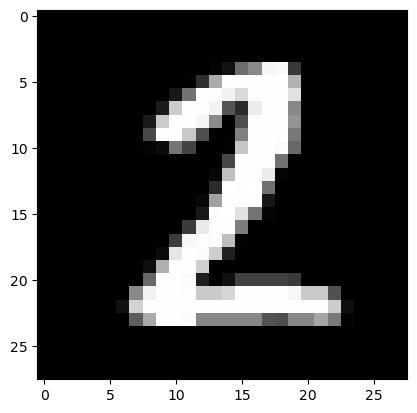

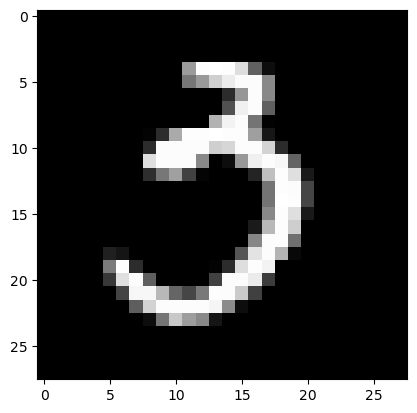

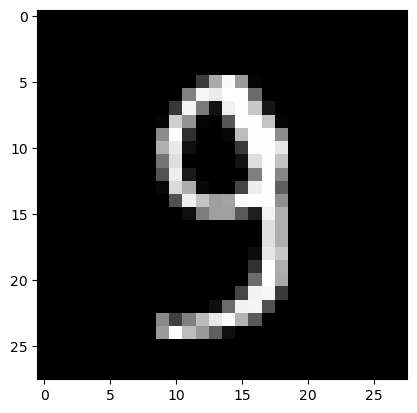

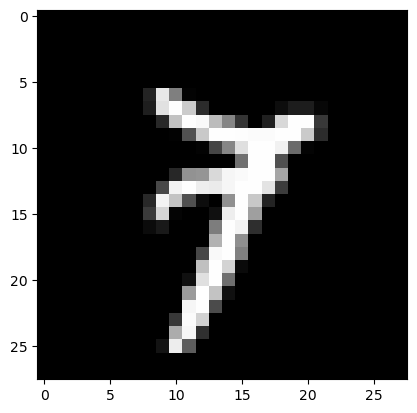

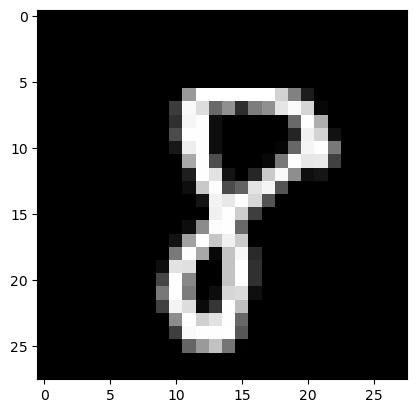

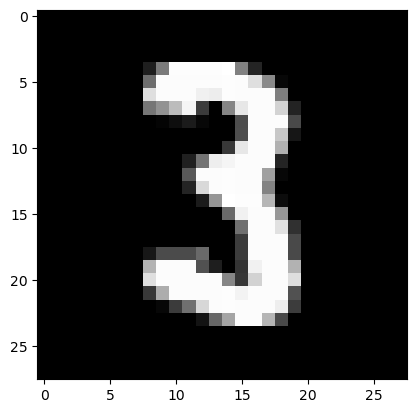

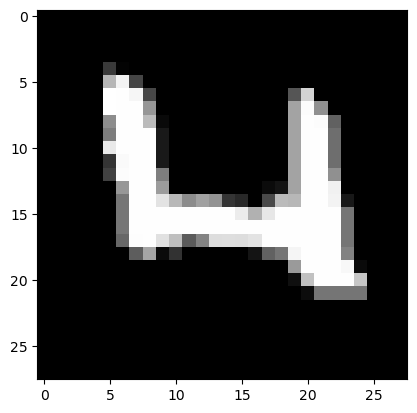

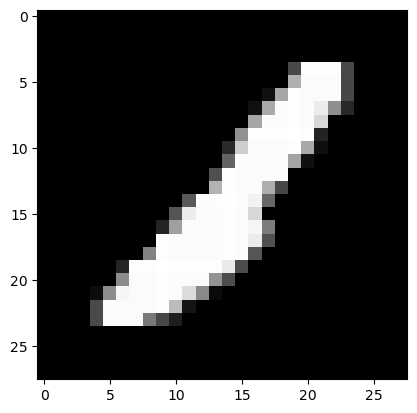

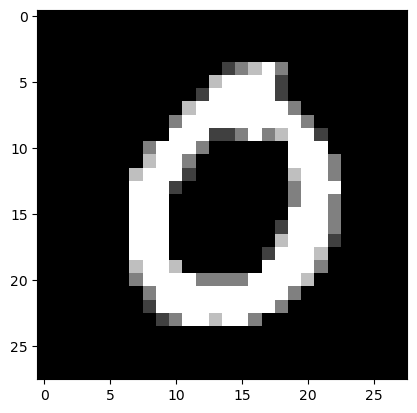

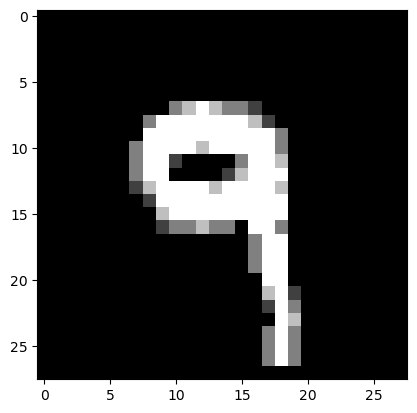

In [61]:
#定义一个函数，用于显示图片
def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()
#把test和train里的图片打印出来
for i in range(10):
    image = test_pixel[i].reshape(28, 28)
    show_image(image)



In [62]:
#使用卷积神经网络训练数据
#定义一个函数，用于训练模型
def train_model(train_pixel, train_label):
    #定义模型
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    #编译模型
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    #训练模型
    model.fit(train_pixel, train_label, epochs=20)
    return model
#训练模型
model = train_model(train_pixel, train_label)







Epoch 1/20
1250/1250 [==============================] - 27s 20ms/step - loss: 0.2335 - accuracy: 0.9391
Epoch 2/20
1250/1250 [==============================] - 26s 21ms/step - loss: 0.0625 - accuracy: 0.9811
Epoch 3/20
1250/1250 [==============================] - 25s 20ms/step - loss: 0.0499 - accuracy: 0.9848
Epoch 4/20
1250/1250 [==============================] - 25s 20ms/step - loss: 0.0423 - accuracy: 0.9870
Epoch 5/20
1250/1250 [==============================] - 24s 19ms/step - loss: 0.0388 - accuracy: 0.9877
Epoch 6/20
1250/1250 [==============================] - 24s 19ms/step - loss: 0.0310 - accuracy: 0.9905
Epoch 7/20
1250/1250 [==============================] - 26s 20ms/step - loss: 0.0287 - accuracy: 0.9908
Epoch 8/20
1250/1250 [==============================] - 23s 18ms/step - loss: 0.0242 - accuracy: 0.9920
Epoch 9/20
1250/1250 [==============================] - 23s 18ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 10/20
1250/1250 [==============================] - 23s 18m

In [66]:
#使用模型对test.csv里的数据进行预测
#输出预测结果和图片
countright=0
def predict(model, test_pixel):
    #对test.csv里的数据进行预测
    test_predict = model.predict(test_pixel)
    #输出预测结果和图片
    for i in range(2000):
        image = test_pixel[i].reshape(28, 28)
        # show_image(image)
        # print('预测结果：', np.argmax(test_predict[i]))
        # print('实际结果：', test_label[i])
        if np.argmax(test_predict[i]) == test_label[i]:
            # print('预测正确')
            global countright
            countright += 1
    
#预测结果
predict(model, test_pixel)
print(countright/2000)

63/63 [==============================] - 0s 4ms/step
0.9745


1/1 [==============================] - 0s 128ms/step
Prediction for digit0 is: 0


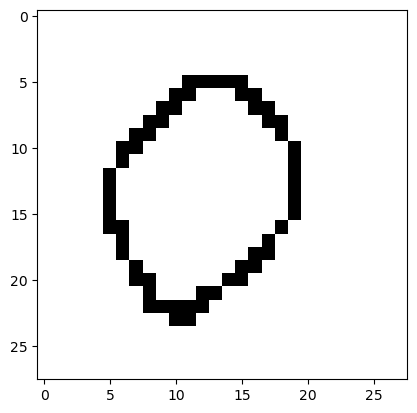

1/1 [==============================] - 0s 28ms/step
Prediction for digit1 is: 1


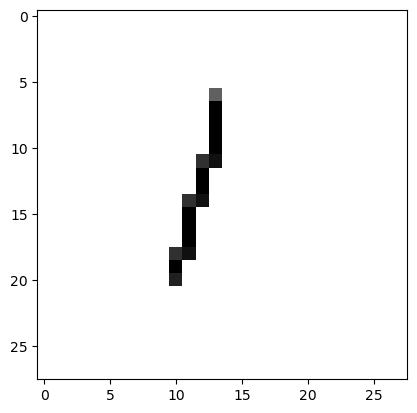

1/1 [==============================] - 0s 28ms/step
Prediction for digit2 is: 2


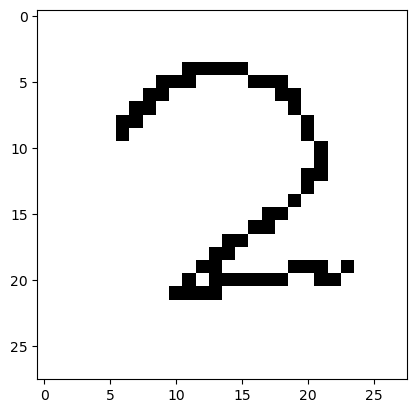

1/1 [==============================] - 0s 25ms/step
Prediction for digit3 is: 3


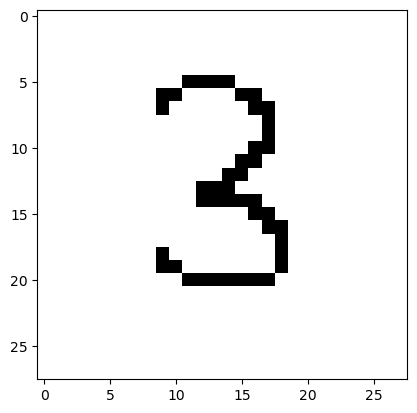

1/1 [==============================] - 0s 27ms/step
Prediction for digit4 is: 4


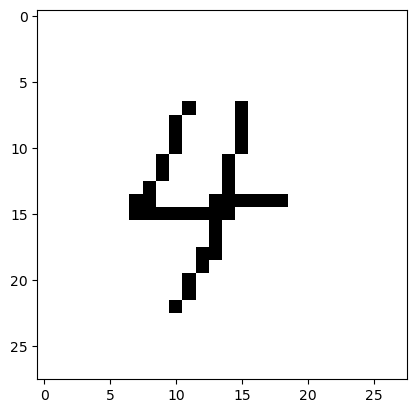

1/1 [==============================] - 0s 31ms/step
Prediction for digit5 is: 5


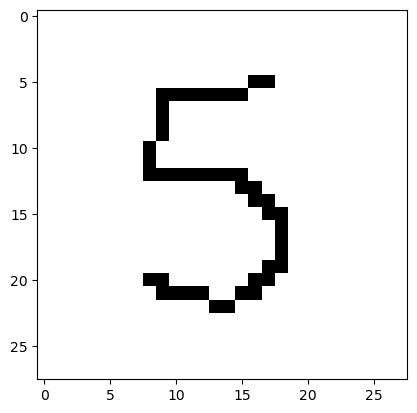

1/1 [==============================] - 0s 29ms/step
Prediction for digit6 is: 6


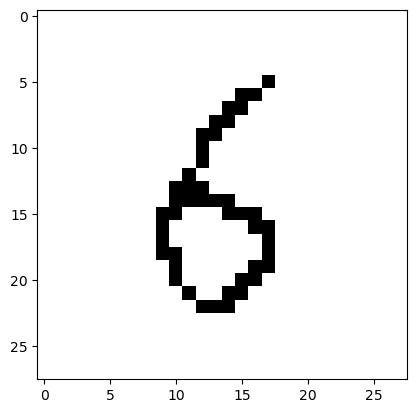

1/1 [==============================] - 0s 26ms/step
Prediction for digit7 is: 7


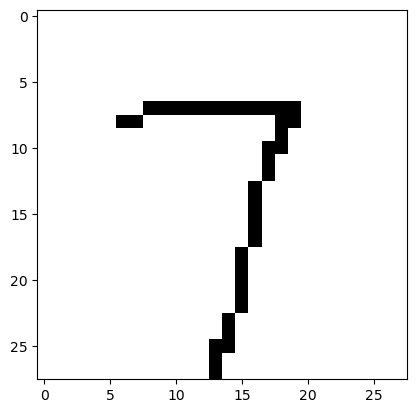

1/1 [==============================] - 0s 26ms/step
Prediction for digit8 is: 8


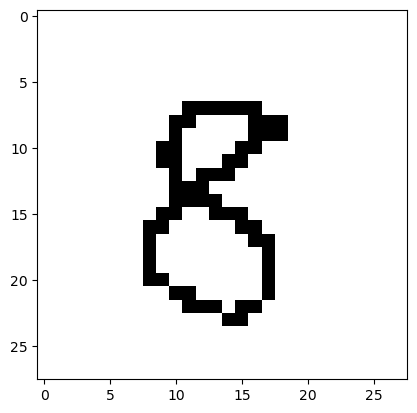

1/1 [==============================] - 0s 26ms/step
Prediction for digit9 is: 8


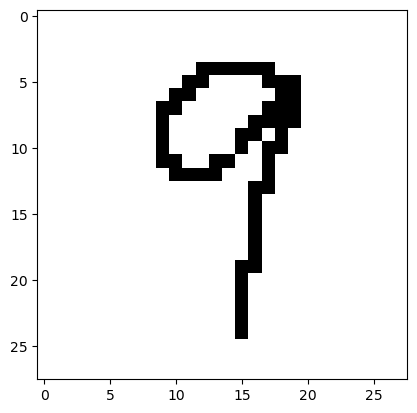

Total count: 0.9


In [67]:
import cv2

test_digit = 0
count=0
while os.path.isfile(f"handwriting/digit{test_digit}.png"):
    try:
        digit = cv2.imread(f"handwriting/digit{test_digit}.png")[:,:,0]
        digit = np.invert([digit])
        prediction = model.predict(digit.reshape(-1, 784))
        if np.argmax(prediction) == test_digit:
            count += 1
        print(f"Prediction for digit{test_digit} is: {np.argmax(prediction)}")
        plt.imshow(digit[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print(f"Error in digit{test_digit}")
    finally:
        test_digit += 1
print(f"Total count: {count/test_digit}")
